In [148]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
!pwd

/content/drive/My Drive/Colab Notebooks/ML/Grooking-Machine-Learning/LinearRegression


In [151]:
%cd drive

[Errno 2] No such file or directory: 'drive'
/content/drive/MyDrive/Colab Notebooks/ML/Grooking-Machine-Learning/LinearRegression


In [152]:
%cd MyDrive

[Errno 2] No such file or directory: 'MyDrive'
/content/drive/MyDrive/Colab Notebooks/ML/Grooking-Machine-Learning/LinearRegression


In [153]:
%cd Colab Notebooks

[Errno 2] No such file or directory: 'Colab Notebooks'
/content/drive/MyDrive/Colab Notebooks/ML/Grooking-Machine-Learning/LinearRegression


In [154]:
%cd ML

[Errno 2] No such file or directory: 'ML'
/content/drive/MyDrive/Colab Notebooks/ML/Grooking-Machine-Learning/LinearRegression


In [155]:
%cd Grooking-Machine-Learning/

[Errno 2] No such file or directory: 'Grooking-Machine-Learning/'
/content/drive/MyDrive/Colab Notebooks/ML/Grooking-Machine-Learning/LinearRegression


In [156]:
%cd LinearRegression/

[Errno 2] No such file or directory: 'LinearRegression/'
/content/drive/MyDrive/Colab Notebooks/ML/Grooking-Machine-Learning/LinearRegression


In [157]:
!ls

data  simpleLInearRegression.ipynb


In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
import random
from mpl_toolkits.mplot3d import Axes3D


np.random.seed(3)

In [159]:
file_path = 'data/tvmarketing.csv'

df = pd.read_csv(file_path)
df.corr()


,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [160]:
X = df["TV"]
Y = df["Sales"]

X_np = X.to_numpy()
Y_np = Y.to_numpy()


In [161]:
sklearn_model = LR().fit(X_np.reshape((len(X_np),1)), Y_np)
sklearn_sales = sklearn_model.predict(X_np.reshape((len(X_np),1)))
sklearn_sales.shape
print(sklearn_model.coef_)
print(sklearn_model.intercept_)

[0.04753664]
7.032593549127695


In [162]:
prediction_df = pd.DataFrame({"TV":X_np,
                              "Sales":Y_np,
                              "Sk_Sales":sklearn_sales})

prediction_df

,TV,Sales,Sk_Sales
0,230.1,22.1,17.970775
1,44.5,10.4,9.147974
2,17.2,9.3,7.850224
3,151.5,18.5,14.234395
4,180.8,12.9,15.627218
...,...,...,...
195,38.2,7.6,8.848493
196,94.2,9.7,11.510545
197,177.0,12.8,15.446579
198,283.6,25.5,20.513985


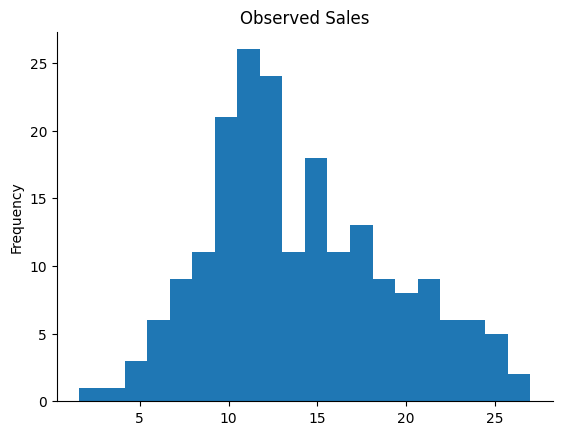

In [163]:
prediction_df['Sales'].plot(kind='hist', bins=20, title='Observed Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

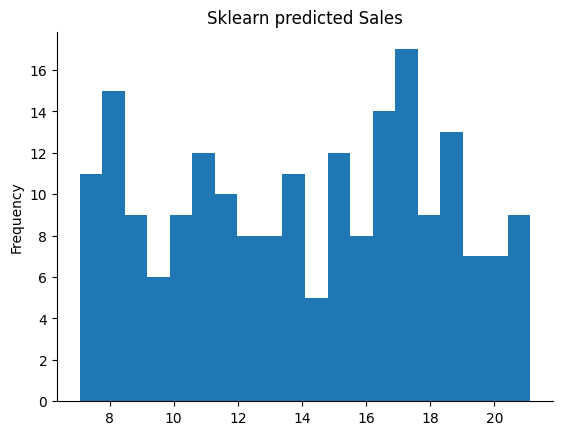

In [164]:
prediction_df['Sk_Sales'].plot(kind='hist', bins=20, title='Sklearn predicted Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

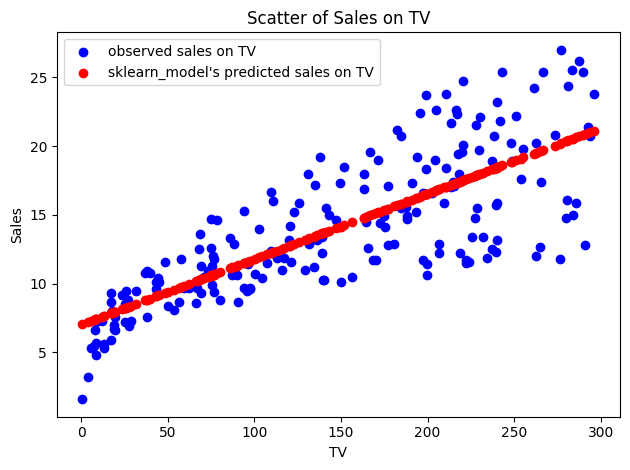

In [165]:
plt.scatter(X_np, Y_np, color='b', label = "observed sales on TV")
plt.scatter(X_np, sklearn_sales, color='r', label = "sklearn_model's predicted sales on TV")
plt.title("Scatter of Sales on TV")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

In [166]:
X_npy = np.array(X).reshape((1,len(X)))
Y_npy = np.array(Y).reshape((1,len(Y)))


In [167]:
def layersizes(X, Y):

  n_x = X.shape[0]
  n_y = Y.shape[0]

  return n_x,n_y

n_x, n_y = layersizes(X_npy, Y_npy)
print(f"# of input layersize: {n_x}")
print(f"# of output layersize: {n_y}")


# of input layersize: 1
# of output layersize: 1


In [168]:
def initialize_parameters(n_x, n_y):

  W = np.random.rand(n_y, n_x) * 0.01
  b = np.zeros((n_y, 1))

  parameters = {"W":W,
                "b":b}

  return parameters


parameters = initialize_parameters(n_x, n_y)
print(f"weight: {parameters['W']}")
print(f"bias: {parameters['b']}")

weight: [[0.00550798]]
bias: [[0.]]


In [169]:
def forward_propagation(parameters, X):

  W = parameters["W"]
  b = parameters["b"]

  Z = np.matmul(W,X) + b
  Y_hat = Z

  return Y_hat


Y_hat = forward_propagation(parameters, X_npy)
print(f"predicated sales:{Y_hat}")

predicated sales:[[1.26738597 0.24510507 0.09473724 0.83445882 0.99584261 0.04791942
  0.31670879 0.66205908 0.04736862 1.10049421 0.36407741 1.1825631
  0.1310899  0.53702796 1.12417852 1.0762591  0.37344098 1.5499453
  0.38115215 0.81132531 1.20294262 1.30759422 0.07270532 1.25747161
  0.34314709 1.44804769 0.7870902  1.32246576 1.37038518 0.38886332
  1.61328706 0.62185083 0.53537556 1.46291923 0.52711359 1.6011695
  1.4700796  0.41144603 0.2373939  1.25581922 1.11536575 0.97491229
  1.61714264 1.13960086 0.13825027 0.96444713 0.49406572 1.32136417
  1.25141283 0.3684838  1.10049421 0.55300109 1.19192666 1.00575697
  1.44694609 1.09553703 0.04020825 0.75018674 1.16108198 1.16053118
  0.29467688 1.43923492 1.31805938 0.56566945 0.72209605 0.38005055
  0.17350134 0.76726148 1.30759422 1.19412985 1.09663862 0.6047761
  0.14761384 0.71273249 1.17540272 0.09308485 0.15146942 0.66371147
  0.02974309 0.63892557 0.4208096  1.32081337 0.41475082 0.37674577
  1.17595352 1.06414155 0.4202588  

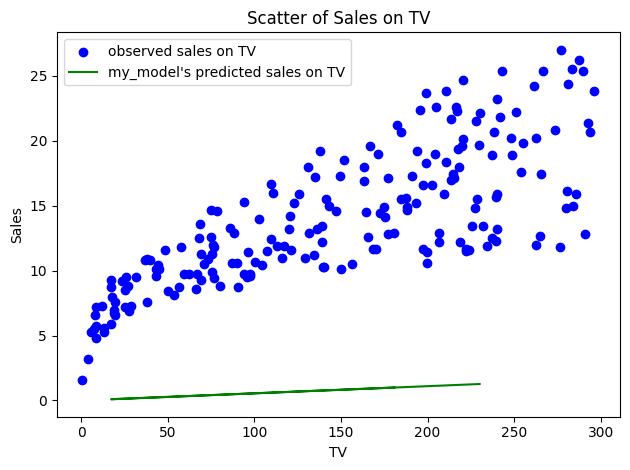

In [170]:
X_plot = X_npy[:, :5].reshape(5)
Y_plot = Y_hat[:, :5].reshape(5)



plt.scatter(X_npy, Y_npy, color='b', label = "observed sales on TV")
plt.plot(X_plot,Y_plot, color='g', label = "my_model's predicted sales on TV")
plt.title("Scatter of Sales on TV")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

In [171]:
def cost_function(Y, Y_hat):

  n = Y.shape[1]
  error = Y - Y_hat
  cost = np.sum(error**2)/(2*n)

  return cost

cost = cost_function(Y_npy, Y_hat)
print(f"variance of predicted sales on observed sales: {cost}")

variance of predicted sales on observed sales: 99.02013683146006


In [172]:
def back_propagation(X, Y, Y_hat):

  n = Y.shape[1]
  C = Y_hat - Y
  dLdW = np.dot(C, X.T)/(2*n)
  dLdb = np.sum(C * 1)/(2*n)

  grads = {"dLdW":dLdW,
           "dLdb":dLdb}

  return grads

grads = back_propagation(X_npy, Y_npy, Y_hat)
print(f"slope of weight on cost_function: {grads['dLdW']}")
print(f"slope of bias on cost_function: {grads['dLdb']}")

slope of weight on cost_function: [[-1125.52745343]]
slope of bias on cost_function: -6.60629649705339


In [173]:
def update_parameters(parameters, grads, learning_rate):

    W = parameters["W"]
    b = parameters["b"]

    dLdW = grads["dLdW"]
    dLdb = grads["dLdb"]

    W = W - learning_rate * dLdW
    b = b - learning_rate * dLdb

    parameters = {"W": W,
                  "b": b}

    return parameters
updated_parameters = update_parameters(parameters, grads, 0.01)
print(f"updated weight: {updated_parameters['W']}")
print(f"updated bias: {updated_parameters['b']}")

updated weight: [[11.26078251]]
updated bias: [[0.06606296]]


In [174]:
def nn_model(X, Y, learning_rate=0.001, num_iterations=100, print_cost=False):

  cl = []
  wl = []
  bl = []

  n_x, n_y = layersizes(X, Y)
  parameters = initialize_parameters(n_x, n_y)

  for i in range(num_iterations):
    wl.append(parameters["W"][0,0])
    bl.append(parameters["b"][0,0])
    Y_hat = forward_propagation(parameters, X)
    cost = cost_function(Y, Y_hat)
    cl.append(cost)
    grads = back_propagation(X, Y, Y_hat)
    parameters = update_parameters(parameters, grads, learning_rate)

    if print_cost and i%10==0:
      print(f"cost after {i+1} iterations is {cost}\n")

  cache ={"cl":cl,
          "wl":wl,
          "bl":bl}

  return parameters,cache



In [175]:
my_model, cache= nn_model(X_npy, Y_npy, 0.00001, 50, True)
cl = cache["cl"]
bl = cache["bl"]
wl = cache["wl"]
print(my_model["W"])
print(my_model["b"])
print(cl)
print(wl)
print(bl)



cost after 1 iterations is 95.51394930657786

cost after 11 iterations is 15.198481037683512

cost after 21 iterations is 11.679979932893293

cost after 31 iterations is 11.525694615664252

cost after 41 iterations is 11.51878423478097

[[0.0832151]]
[[0.0008319]]
[95.51394930657786, 72.952781019225, 56.45157545313792, 44.38261663481466, 35.55539578364794, 29.099176739413352, 24.377104509461784, 20.9233844016817, 18.397334945874125, 16.549782276165185, 15.198481037683512, 14.210137278209366, 13.487260020752434, 12.958544525403305, 12.571838622899644, 12.288998302587725, 12.082125097935227, 11.930814116495997, 11.820141253561374, 11.73919104354179, 11.679979932893293, 11.636668763710416, 11.604986785523801, 11.581810378478199, 11.564854932159074, 11.552449486274183, 11.543371903219466, 11.536728313565332, 11.53186494268406, 11.528303620890311, 11.525694615664252, 11.523782133217196, 11.522379086393665, 11.521348639956432, 11.520590712838505, 11.520032105912401, 11.519619281456917, 11.51

In [176]:
def predict(parameters, X):

  Y_pred = forward_propagation(parameters, X)

  return Y_pred

In [177]:
Y_pred = predict(my_model, X_npy)

prediction_df["my_model_Sales"] = Y_pred.reshape((200,))

prediction_df

,TV,Sales,Sk_Sales,my_model_Sales
0,230.1,22.1,17.970775,19.148627
1,44.5,10.4,9.147974,3.703904
2,17.2,9.3,7.850224,1.432132
3,151.5,18.5,14.234395,12.607920
4,180.8,12.9,15.627218,15.046123
...,...,...,...,...
195,38.2,7.6,8.848493,3.179649
196,94.2,9.7,11.510545,7.839695
197,177.0,12.8,15.446579,14.729905
198,283.6,25.5,20.513985,23.600635


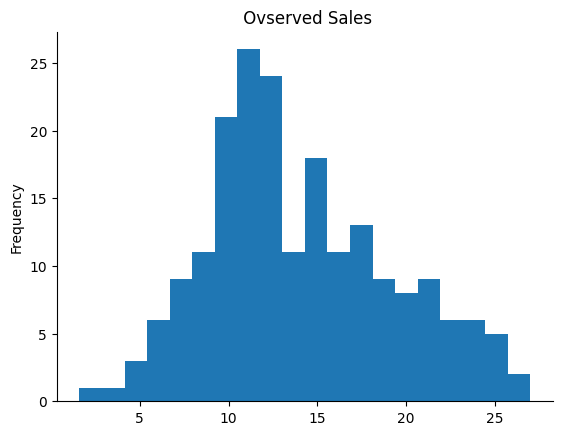

In [178]:
prediction_df['Sales'].plot(kind='hist', bins=20, title=' Ovserved Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

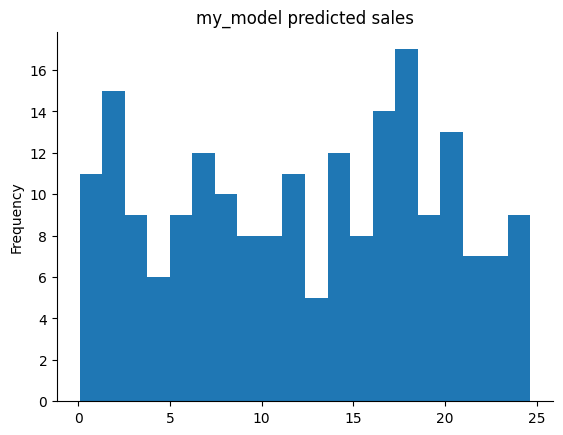

In [179]:
prediction_df['my_model_Sales'].plot(kind='hist', bins=20, title='my_model predicted sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

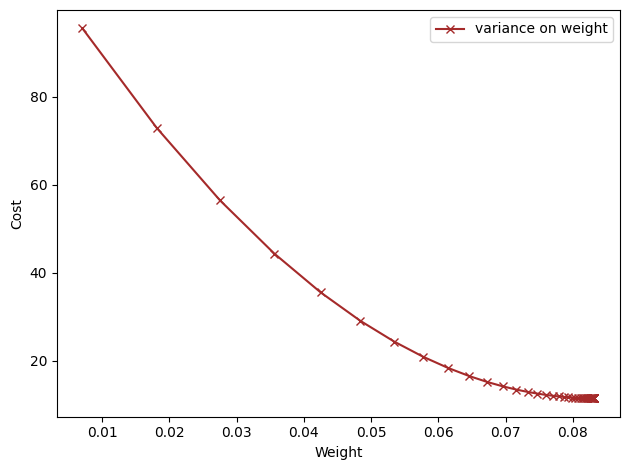

In [180]:
plt.plot(wl,cl, c='brown', marker = 'x', label='variance on weight')
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.legend()
plt.tight_layout()
plt.show()

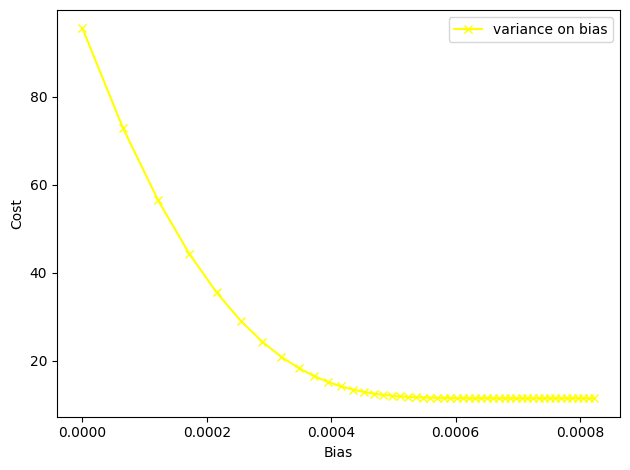

In [181]:
plt.plot(bl,cl, c='yellow', marker = 'x', label='variance on bias')
plt.xlabel('Bias')
plt.ylabel('Cost')
plt.legend()
plt.tight_layout()
plt.show()

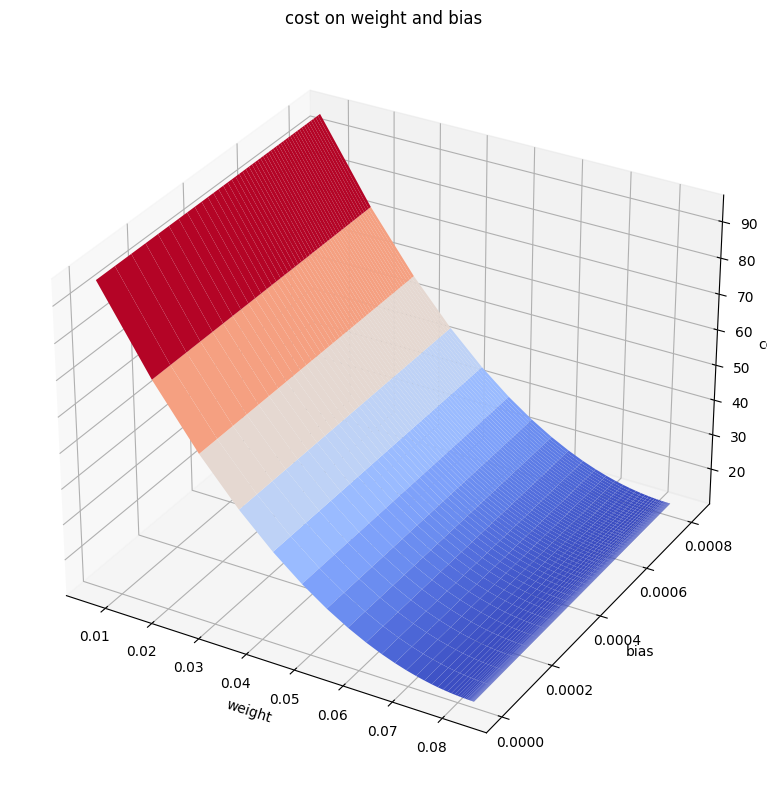

In [182]:
c = np.tile(cl, (50, 1))
w, b =np.meshgrid(wl,bl)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection = "3d")
ax.plot_surface(w,b,c,cmap='coolwarm')
ax.set_title("cost on weight and bias")
ax.set_xlabel("weight")
ax.set_ylabel("bias")
ax.set_zlabel("cost")
plt.tight_layout()
plt.show()

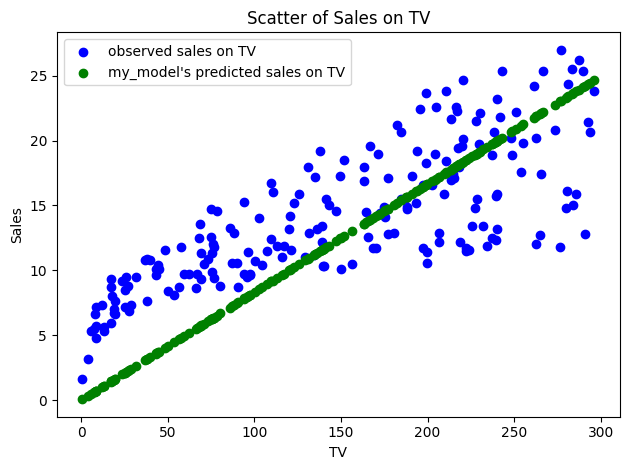

In [183]:
plt.scatter(X_np, Y_np, color='b', label = "observed sales on TV")
plt.scatter(X_npy, Y_pred, color='g', label = "my_model's predicted sales on TV")
plt.title("Scatter of Sales on TV")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.tight_layout()
plt.legend()
plt.show()

In [184]:
class StatisticsModel:
    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X, Y):
        self.m = (np.mean(X) * np.mean(Y) - np.mean(X * Y)) / ((np.mean(X) ** 2) - np.mean(X ** 2))
        self.b = np.mean(Y) - self.m * np.mean(X)

    def predict(self, X):
        return self.m * X + self.b


stat_model = StatisticsModel()
stat_model.fit(X_np, Y_np)
Y_stat_pred = stat_model.predict(X_np)

prediction_df['Stat_Sales'] = Y_stat_pred
print(Y_stat_pred.shape)


(200,)


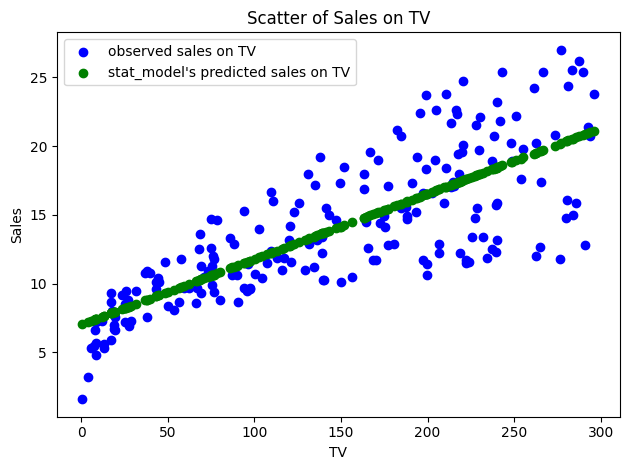

In [185]:
plt.scatter(X_np, Y_np, color='b', label = "observed sales on TV")
plt.scatter(X_np, Y_stat_pred, color='g', label = "stat_model's predicted sales on TV")
plt.title("Scatter of Sales on TV")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.tight_layout()
plt.legend()
plt.show()

In [186]:
prediction_df

,TV,Sales,Sk_Sales,my_model_Sales,Stat_Sales
0,230.1,22.1,17.970775,19.148627,17.970775
1,44.5,10.4,9.147974,3.703904,9.147974
2,17.2,9.3,7.850224,1.432132,7.850224
3,151.5,18.5,14.234395,12.607920,14.234395
4,180.8,12.9,15.627218,15.046123,15.627218
...,...,...,...,...,...
195,38.2,7.6,8.848493,3.179649,8.848493
196,94.2,9.7,11.510545,7.839695,11.510545
197,177.0,12.8,15.446579,14.729905,15.446579
198,283.6,25.5,20.513985,23.600635,20.513985


In [187]:
prediction_df.corr()

,TV,Sales,Sk_Sales,my_model_Sales,Stat_Sales
TV,1.000000,0.782224,1.000000,1.000000,1.000000
Sales,0.782224,1.000000,0.782224,0.782224,0.782224
Sk_Sales,1.000000,0.782224,1.000000,1.000000,1.000000
my_model_Sales,1.000000,0.782224,1.000000,1.000000,1.000000
Stat_Sales,1.000000,0.782224,1.000000,1.000000,1.000000


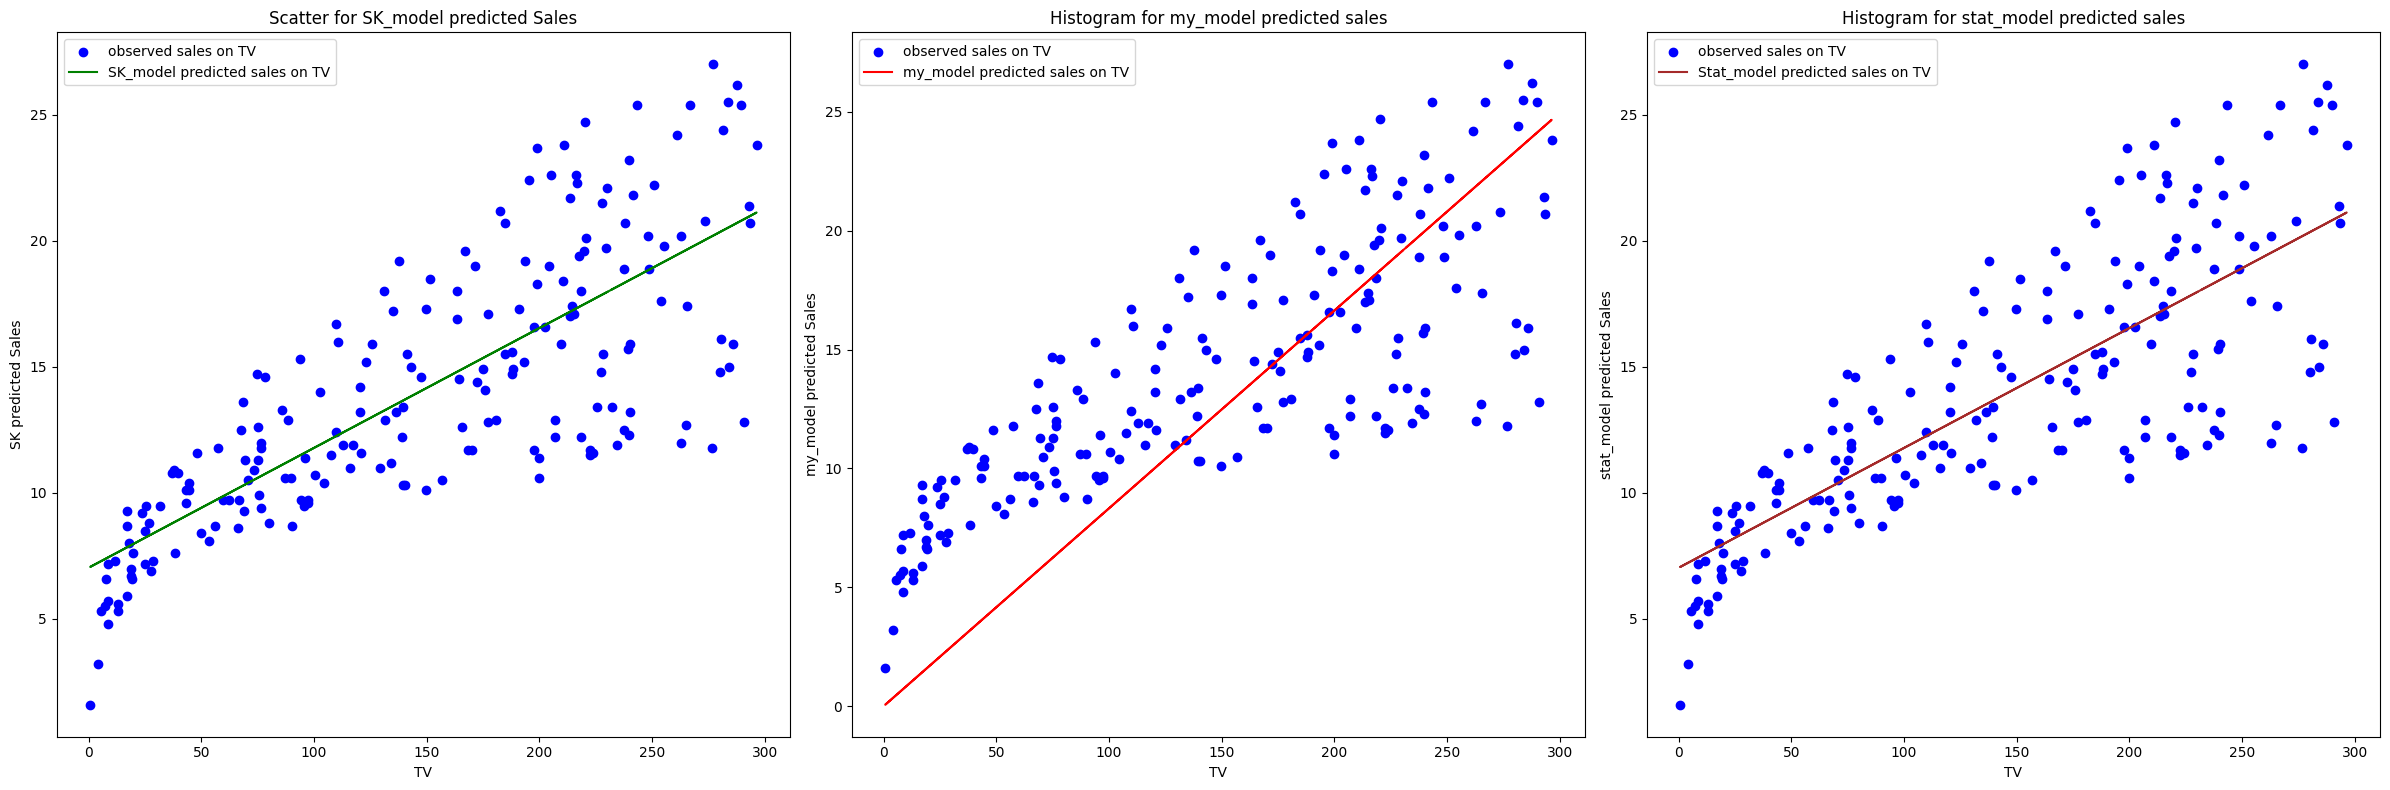

In [210]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 8))


# Plot histogram for data2
axs[0].scatter(prediction_df['TV'], prediction_df['Sales'], color='b', label = "observed sales on TV")
axs[0].plot(prediction_df['TV'], prediction_df['Sk_Sales'], color='green', label = "SK_model predicted sales on TV")
axs[0].set_ylabel('SK predicted Sales')
axs[0].set_xlabel('TV')
axs[0].set_title('Scatter for SK_model predicted Sales')
axs[0].legend()

# Plot histogram for data3
axs[1].scatter(prediction_df['TV'], prediction_df['Sales'], color='b', label = "observed sales on TV")
axs[1].plot(prediction_df['TV'], prediction_df['my_model_Sales'],  color='red', label = "my_model predicted sales on TV")
axs[1].set_ylabel('my_model predicted Sales')
axs[1].set_xlabel('TV')
axs[1].set_title('Histogram for my_model predicted sales')
axs[1].legend()


# Plot histogram for data3
axs[2].scatter(prediction_df['TV'], prediction_df['Sales'], color='b', label = "observed sales on TV")
axs[2].plot(prediction_df['TV'], prediction_df['Stat_Sales'], color='brown', label = "Stat_model predicted sales on TV")
axs[2].set_ylabel('stat_model predicted Sales')
axs[2].set_xlabel('TV')
axs[2].set_title('Histogram for stat_model predicted sales')
axs[2].legend()


#show the labels


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


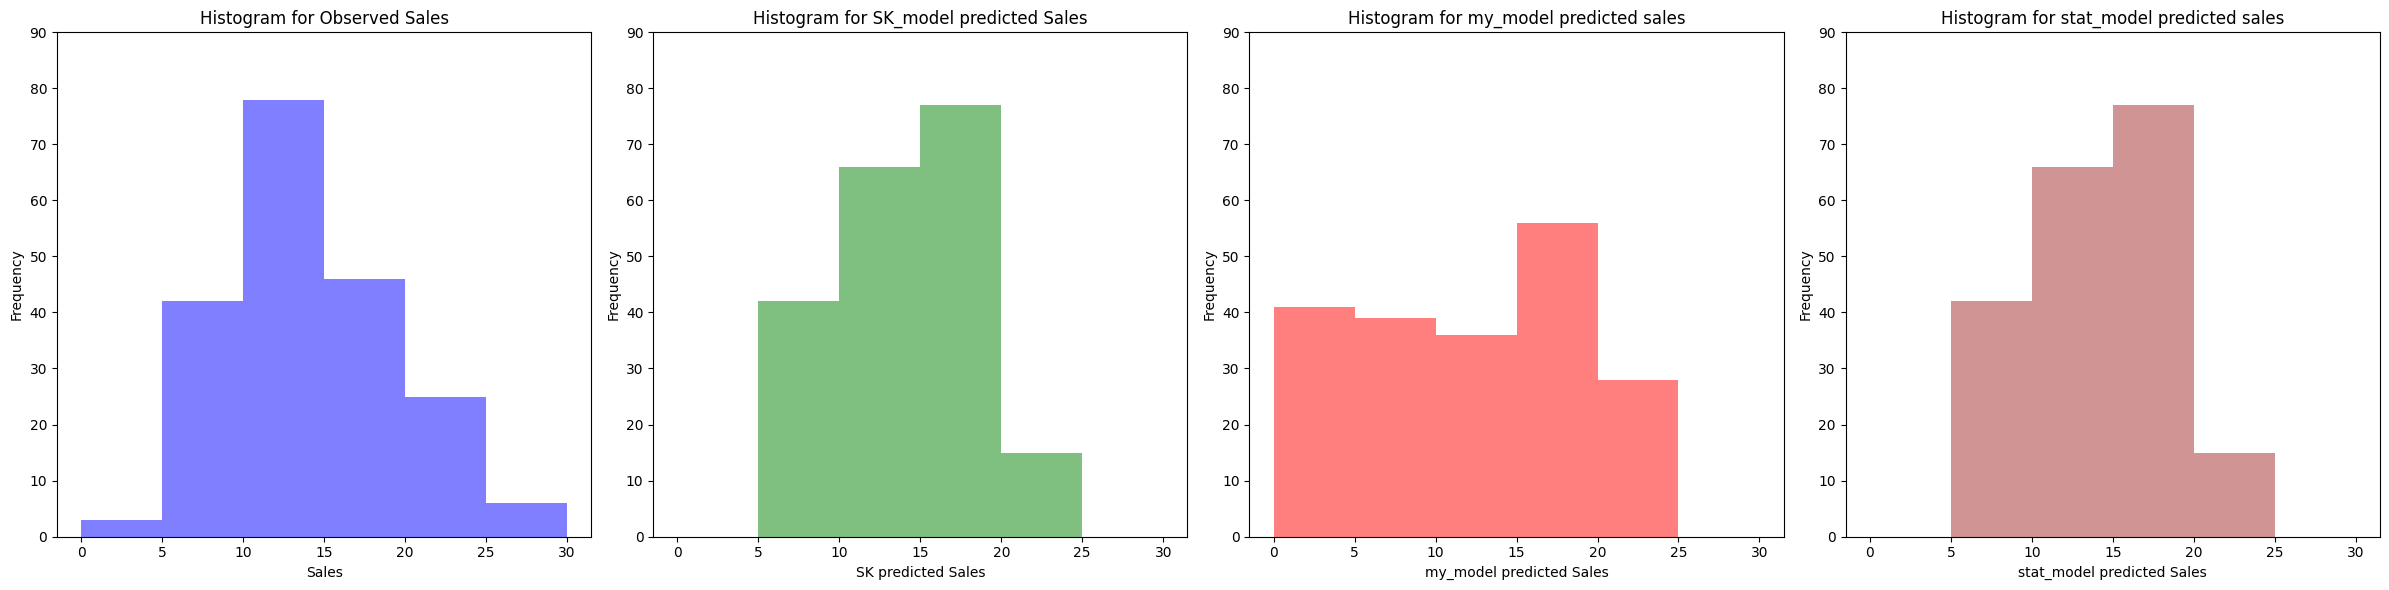

In [205]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
bins = [i for i in range(0,31,5)]
y_ticks = [i for i in range(0,100,10)]
x_ticks = [i for i in range(0,31,10)]

# Plot histogram for data1
axs[0].hist(prediction_df['Sales'], bins=bins, color='blue', alpha=0.5)
axs[0].set_xlabel('Sales')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram for Observed Sales')
#axs[0].set_xticks(x_ticks)
axs[0].set_yticks(y_ticks)

# Plot histogram for data2
axs[1].hist(prediction_df['Sk_Sales'], bins=bins, color='green', alpha=0.5)
axs[1].set_xlabel('SK predicted Sales')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram for SK_model predicted Sales')
#axs[1].set_xticks(x_ticks)
axs[1].set_yticks(y_ticks)

# Plot histogram for data3
axs[2].hist(prediction_df['my_model_Sales'], bins=bins, color='red', alpha=0.5)
axs[2].set_xlabel('my_model predicted Sales')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram for my_model predicted sales')
#axs[2].set_xticks(x_ticks)
axs[2].set_yticks(y_ticks)

# Plot histogram for data3
axs[3].hist(prediction_df['Stat_Sales'], bins=bins, color='brown', alpha=0.5)
axs[3].set_xlabel('stat_model predicted Sales')
axs[3].set_ylabel('Frequency')
axs[3].set_title('Histogram for stat_model predicted sales')
#axs[3].set_xticks(x_ticks)
axs[3].set_yticks(y_ticks)



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
